<a href="https://colab.research.google.com/github/Hjhirp/Apple-Grading-Using-Computer-Vision/blob/main/Lab6/6_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import skimage.io
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt
import pandas as pd

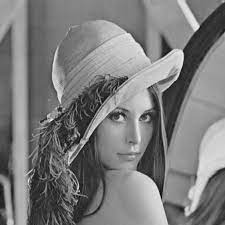

In [ ]:
image1 = skimage.io.imread('/content/lenna.jfif')

cv2_imshow(image1)

In [ ]:
image1.shape

(600, 608)

In [ ]:
img = []
for i in range(image1.shape[0]):
  l=[]
  for j in range(image1.shape[1]):
    l.append(image1[i][j]*((-1)**(i+j)))
  img.append(l)

In [ ]:
# img[10][0]

In [ ]:
img= np.asarray(img,dtype='float')

In [ ]:
img.shape

(600, 608)

In [ ]:
fimg = np.fft.fft2(img)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


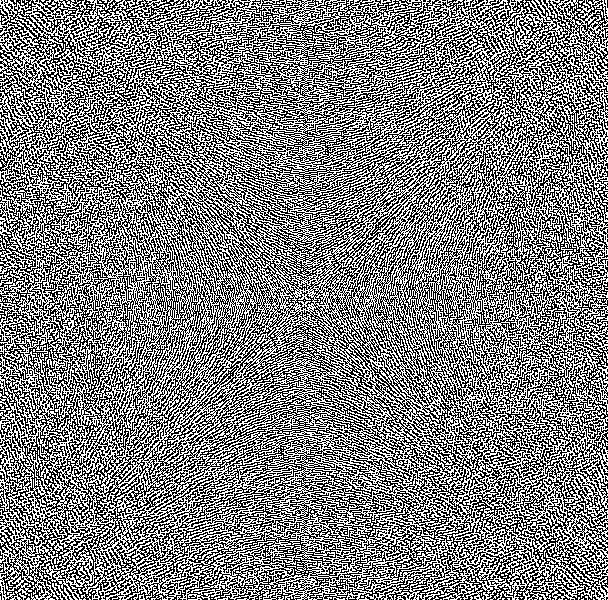

In [ ]:
cv2_imshow(255*np.log(fimg.real))

In [ ]:
huv = np.zeros((fimg.shape[0],fimg.shape[1]))

for i in range(fimg.shape[0]):
  for j in range(fimg.shape[1]):
    d = ((fimg.shape[0]/2-i)**2+(fimg.shape[1]/2-j)**2)**(0.5)
    if d < 250:
      huv[i][j] = 1

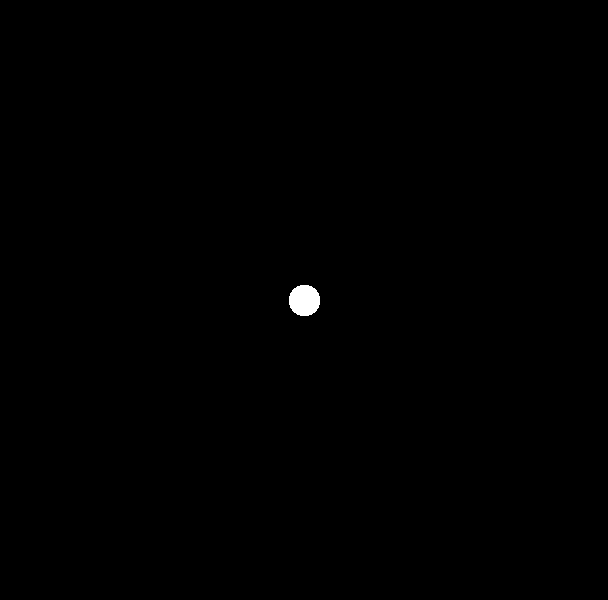

In [ ]:
cv2_imshow(255*huv)

In [ ]:
filimg = fimg*huv

In [ ]:
inv = np.fft.ifft2(filimg)

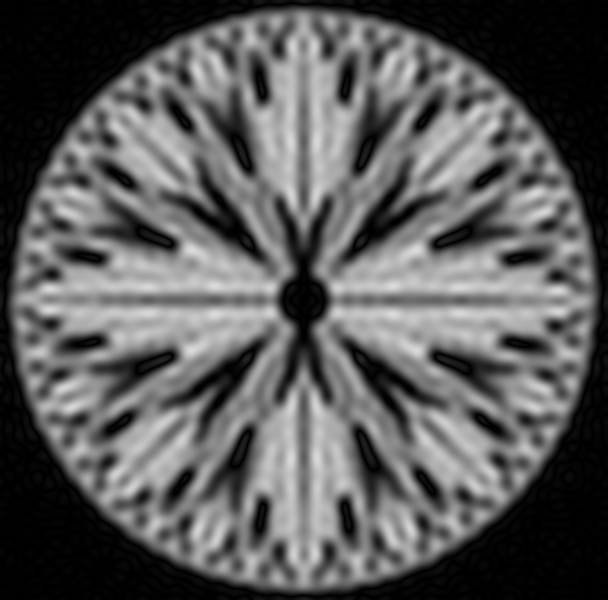

In [ ]:
cv2_imshow(np.abs(inv.real))

High pass filter



In [ ]:
huv = np.zeros((fimg.shape[0],fimg.shape[1]))

for i in range(fimg.shape[0]):
  for j in range(fimg.shape[1]):
    d = ((fimg.shape[0]/2-i)**2+(fimg.shape[1]/2-j)**2)**(0.5)
    if d > 15:
      huv[i][j] = 1

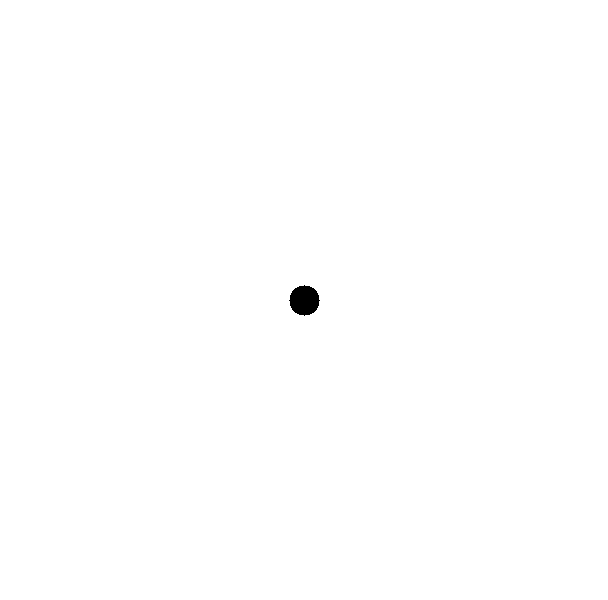

In [ ]:
cv2_imshow(255*huv)

In [ ]:
filimg = fimg*huv

In [ ]:
inv = np.fft.ifft2(filimg)

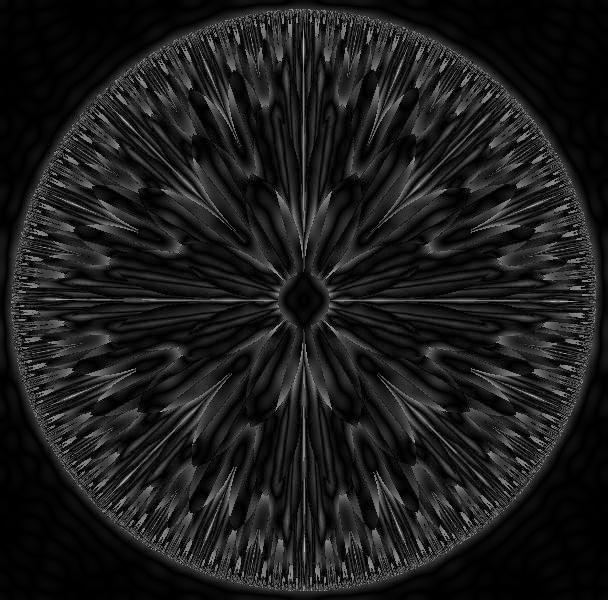

In [ ]:
cv2_imshow(np.abs(inv.real))

Butterworth filter low pass

In [ ]:
huv = np.zeros((fimg.shape[0],fimg.shape[1]))
do=10
for i in range(fimg.shape[0]):
  for j in range(fimg.shape[1]):
    d = ((fimg.shape[0]/2-i)**2+(fimg.shape[1]/2-j)**2)**(0.5)

    huv[i][j] = 1/(1+(d/do)**2)

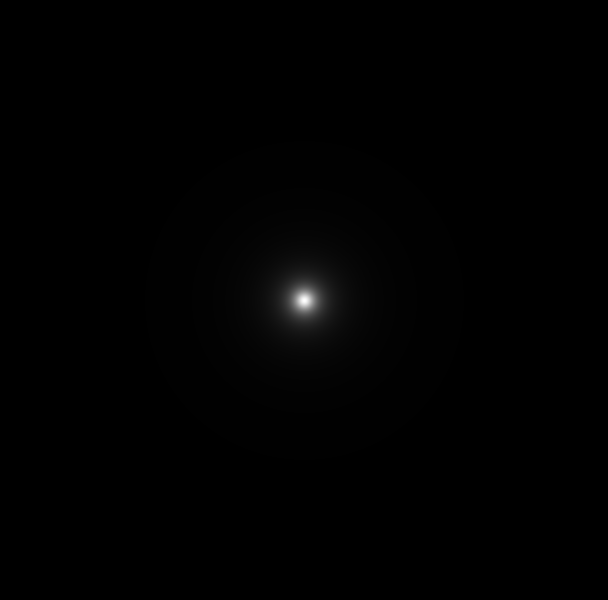

In [ ]:
cv2_imshow(255*huv)

In [ ]:
filimg = fimg*huv

In [ ]:
inv = np.fft.ifft2(filimg)

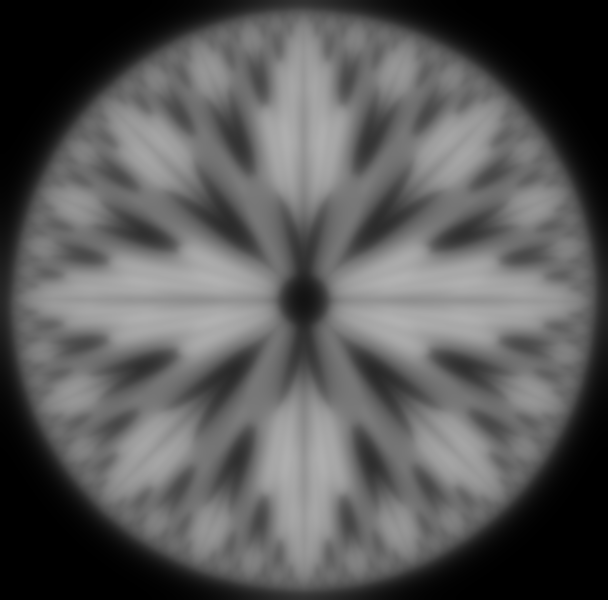

In [ ]:
cv2_imshow(np.abs(inv.real))

Gaussian low pass

In [ ]:
huv = np.zeros((fimg.shape[0],fimg.shape[1]))
do=5
for i in range(fimg.shape[0]):
  for j in range(fimg.shape[1]):
    d = ((fimg.shape[0]/2-i)**2+(fimg.shape[1]/2-j)**2)**(0.5)

    huv[i][j] = np.exp(-d**2/do**2)

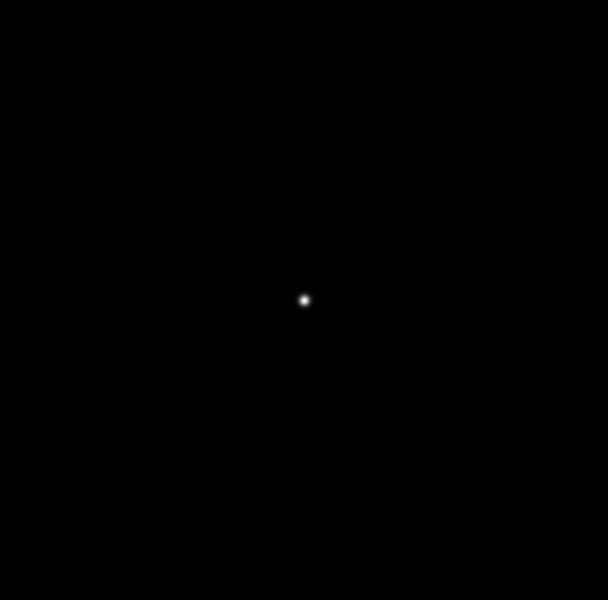

In [ ]:
cv2_imshow(255*huv)

In [ ]:
filimg = fimg*huv

In [ ]:
inv = np.fft.ifft2(filimg)

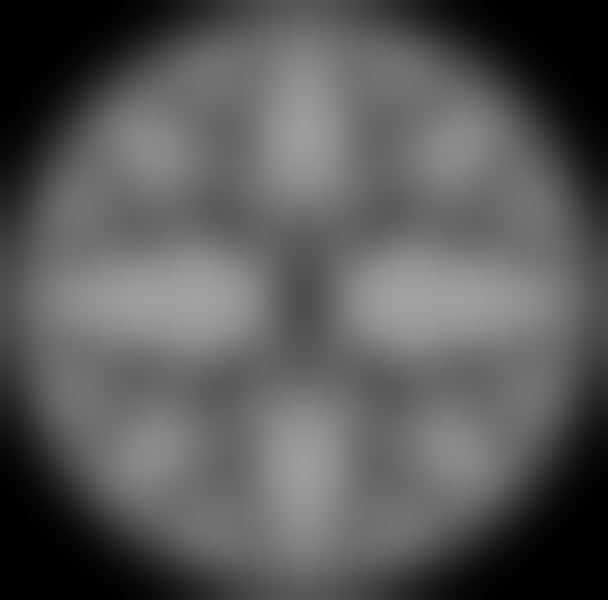

In [ ]:
cv2_imshow(np.abs(inv.real))

Butterworth high pass

In [ ]:
huv = np.zeros((fimg.shape[0],fimg.shape[1]))
do=5
for i in range(fimg.shape[0]):
  for j in range(fimg.shape[1]):
    d = ((fimg.shape[0]/2-i)**2+(fimg.shape[1]/2-j)**2)**(0.5)
    if d!=0:
      huv[i][j] = 1/(1+(do/d)**2)

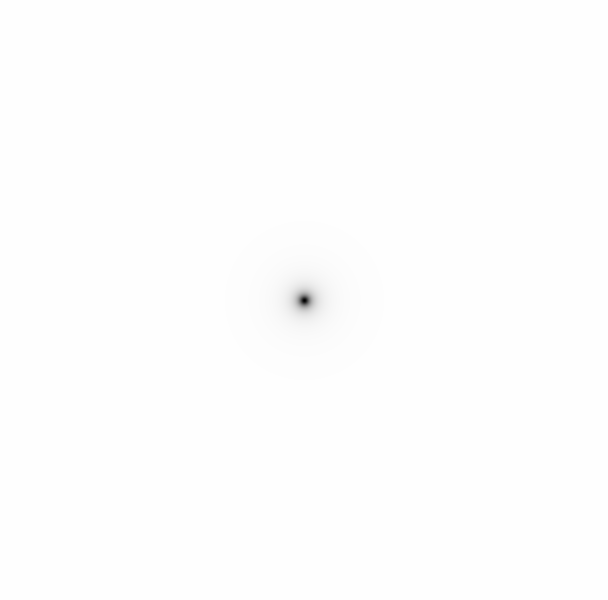

In [ ]:
cv2_imshow(255*huv)

In [ ]:
filimg = fimg*huv

In [ ]:
inv = np.fft.ifft2(filimg)

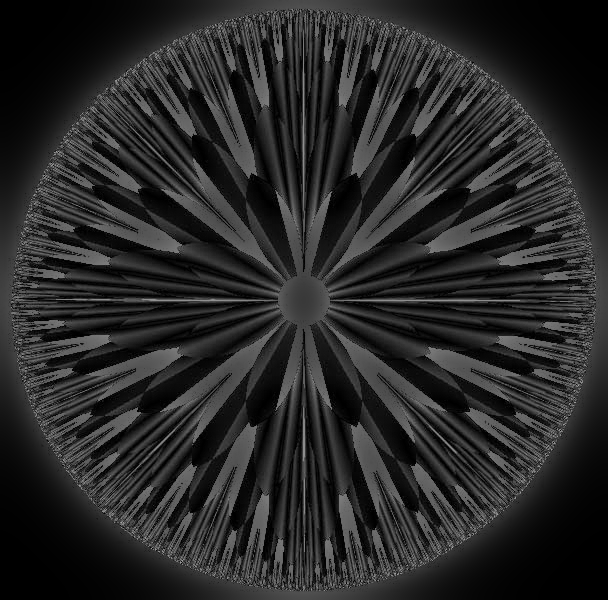

In [ ]:
cv2_imshow(np.abs(inv.real))

Gaussian High Pass

In [ ]:
huv = np.zeros((fimg.shape[0],fimg.shape[1]))
do=5
for i in range(fimg.shape[0]):
  for j in range(fimg.shape[1]):
    d = ((fimg.shape[0]/2-i)**2+(fimg.shape[1]/2-j)**2)**(0.5)

    huv[i][j] = 1-np.exp(-d**2/do**2)

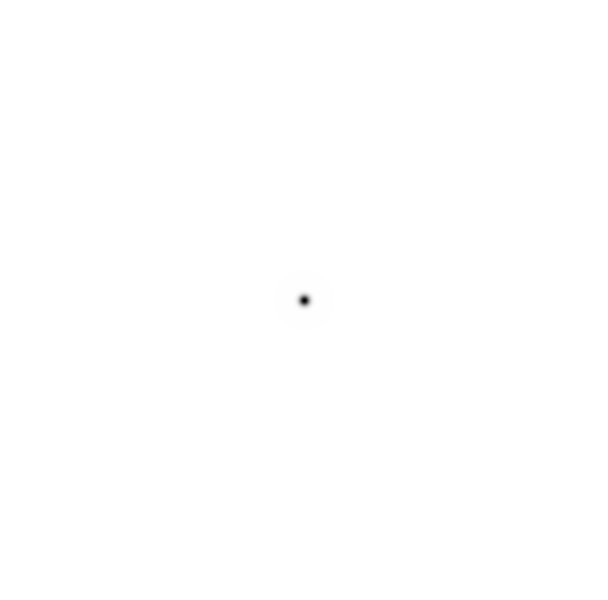

In [ ]:
cv2_imshow(255*huv)

In [ ]:
filimg = fimg*huv

In [ ]:
inv = np.fft.ifft2(filimg)

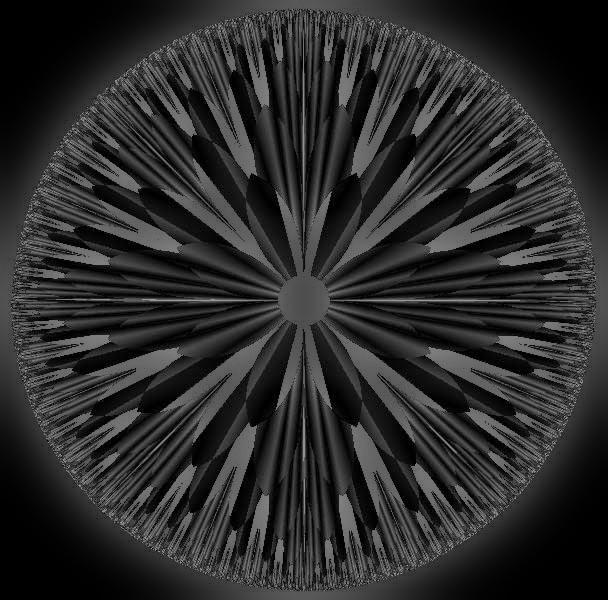

In [ ]:
cv2_imshow(np.abs(inv.real))